In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/ysasamson/PovertyPredictorModel/main/povpred.csv')

In [3]:
df.head()

,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literate,can_add,...,has_investment,bank_interest_rate,borrowed_for_emergency_last_year,borrowed_for_daily_expenses_last_year,borrowed_for_home_or_biz_last_year,can_call_viaphone,can_text_viaphone,can_use_internet_viaphone,active_bank_user,poverty_probability
0,C,False,18,True,True,P,Other,1.0,True,True,...,False,NaN,False,False,False,True,True,False,True,0.515
1,C,True,30,True,True,P,Other,1.0,True,True,...,False,NaN,False,False,False,True,False,False,True,0.981
2,A,False,20,True,True,Q,Spouse,1.0,True,True,...,False,NaN,False,False,False,True,False,False,False,0.982
3,A,False,61,False,True,Q,Head,0.0,False,True,...,False,NaN,False,False,False,True,False,False,False,0.879
4,D,False,26,True,True,X,Spouse,1.0,True,False,...,False,NaN,False,False,False,True,True,False,False,0.796


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country                                12600 non-null  object 
 1   is_urban                               12600 non-null  bool   
 2   age                                    12600 non-null  int64  
 3   female                                 12600 non-null  bool   
 4   married                                12600 non-null  bool   
 5   religion                               12600 non-null  object 
 6   relationship_to_hh_head                12600 non-null  object 
 7   education_level                        12364 non-null  float64
 8   literate                               12600 non-null  bool   
 9   can_add                                12600 non-null  bool   
 10  can_divide                             12600 non-null  bool   
 11  em

In [5]:
df.isna().sum()

country                                      0
is_urban                                     0
age                                          0
female                                       0
married                                      0
religion                                     0
relationship_to_hh_head                      0
education_level                            236
literate                                     0
can_add                                      0
can_divide                                   0
employed_last_year                           0
employment_category_last_year                0
employment_type_last_year                    0
income_own_business_last_year                0
income_private_sector_last_year              0
income_public_sector_last_year               0
num_times_borrowed_last_year                 0
borrowing_recency                            0
formal_savings                               0
informal_savings                             0
has_insurance

#Data Preparation

In [6]:
# bank_interest_rate column dropped as 98% of rows are null
df = df.drop('bank_interest_rate',axis=1)

In [7]:
#fill null education_level values with mode
df['education_level'].fillna(df['education_level'].mode()[0], inplace=True)

In [8]:
#Create new column based on poverty probability
#if probability is >.5, status is poor (1); if probability is <=.5, not poor (0)
df['poverty_status'] = df['poverty_probability'].apply(lambda x: 0 if x <= 0.5 else 1)

In [9]:
#Changed bool to 0/1
df = df.applymap(lambda x: 1 if x == True else x)
df = df.applymap(lambda x: 0 if x == False else x)

In [25]:
list(df.columns)

['country',
 'is_urban',
 'age',
 'female',
 'married',
 'religion',
 'relationship_to_hh_head',
 'education_level',
 'literate',
 'can_add',
 'can_divide',
 'employed_last_year',
 'employment_category_last_year',
 'employment_type_last_year',
 'income_own_business_last_year',
 'income_private_sector_last_year',
 'income_public_sector_last_year',
 'num_times_borrowed_last_year',
 'borrowing_recency',
 'formal_savings',
 'informal_savings',
 'has_insurance',
 'has_investment',
 'borrowed_for_emergency_last_year',
 'borrowed_for_daily_expenses_last_year',
 'borrowed_for_home_or_biz_last_year',
 'can_call_viaphone',
 'can_text_viaphone',
 'can_use_internet_viaphone',
 'active_bank_user',
 'poverty_probability',
 'poverty_status']

#Feature Analysis

<ipython-input-10-276c7d6b943c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df.corr()


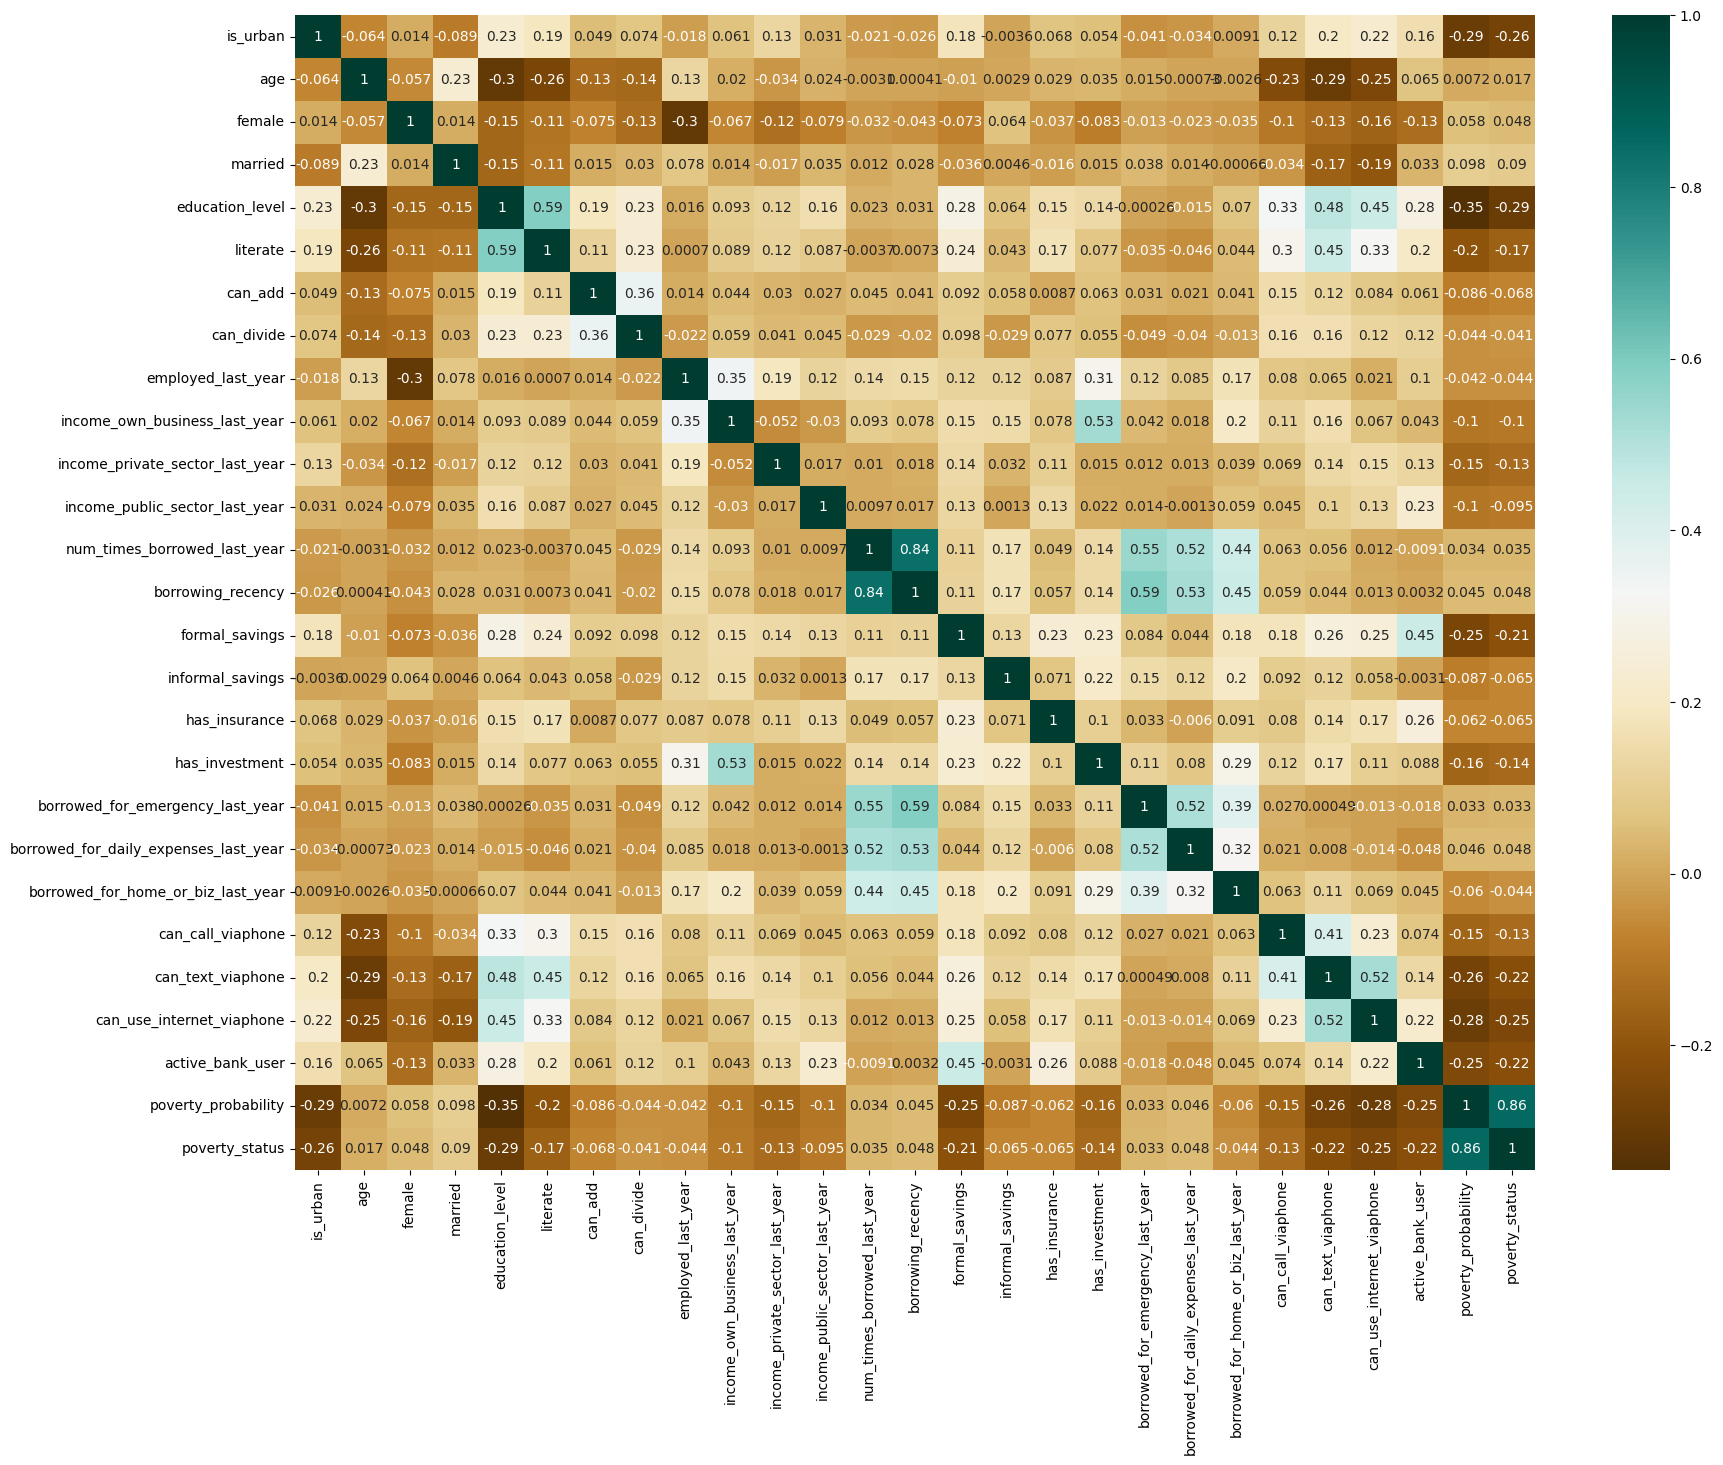

In [10]:
# plotting correlation heatmap
df_corr=df.corr()
plt.subplots(figsize=(20,15))
dataplot=sns.heatmap(df_corr,xticklabels=True, yticklabels=True,annot=True,cmap='BrBG')

# displaying heatmap
plt.show()

#Creating Logistic Regression model

In [11]:
features = ['is_urban', 'education_level', 'formal_savings', 'can_text_viaphone','can_use_internet_viaphone','active_bank_user']
X = df[features]
y = df['poverty_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [12]:
model = LogisticRegression()

In [13]:
model.fit(X_train,y_train)

LogisticRegression()

In [14]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, ..., 1, 1, 1])

#Logistic Regression Model Evaluation

##Confusion Matrix

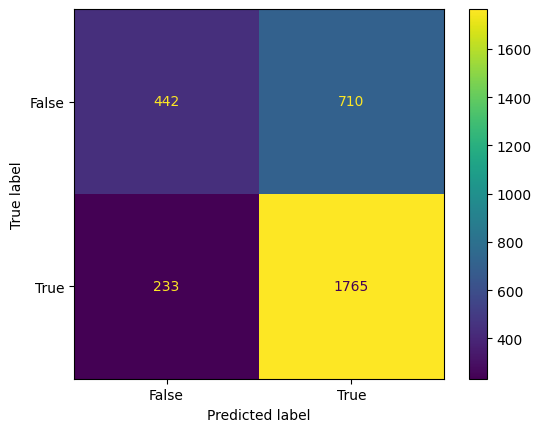

In [15]:
cm = confusion_matrix(y_test,predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

##Accuracy

In [16]:
print(accuracy_score(y_test,predictions))

0.7006349206349206


##Precision

In [17]:
print(precision_score(y_test, predictions))

0.7131313131313132


##Recall

In [18]:
print(recall_score(y_test, predictions))

0.8833833833833834


##F1 Score

In [19]:
print(f1_score(y_test, predictions))

0.7891795215738878


##ROC_AUC

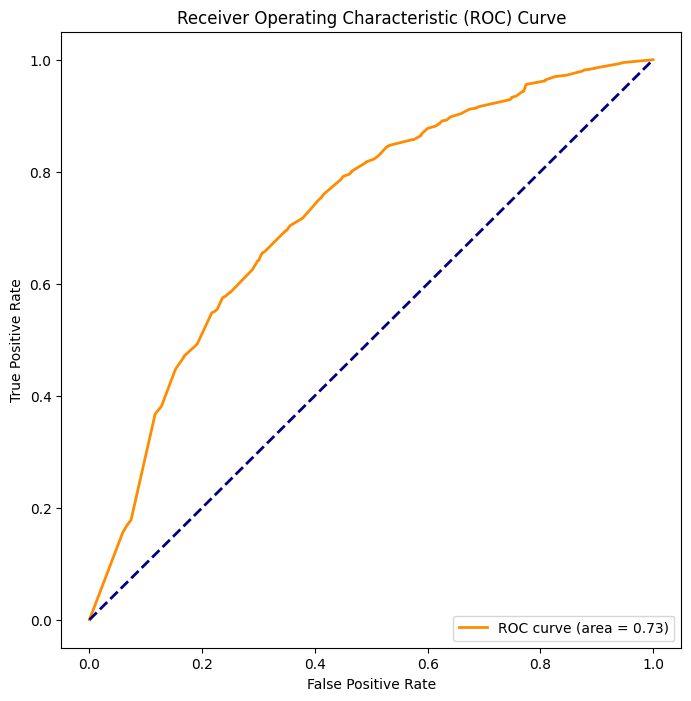

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

##Classification Report

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.38      0.48      1152
           1       0.71      0.88      0.79      1998

    accuracy                           0.70      3150
   macro avg       0.68      0.63      0.64      3150
weighted avg       0.69      0.70      0.68      3150

